In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
X = boston.data
y = boston.target
print(boston.DESCR)
type(boston)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

sklearn.utils.Bunch

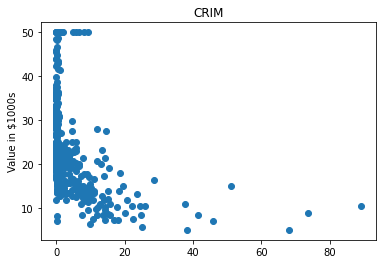

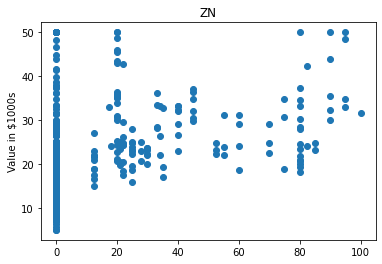

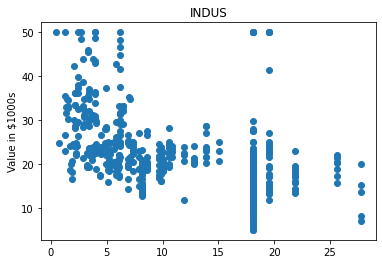

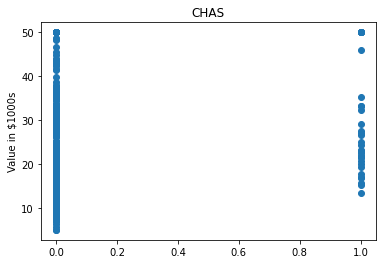

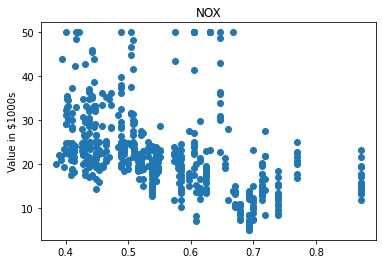

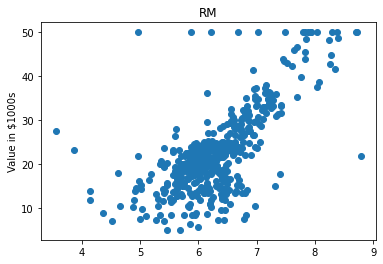

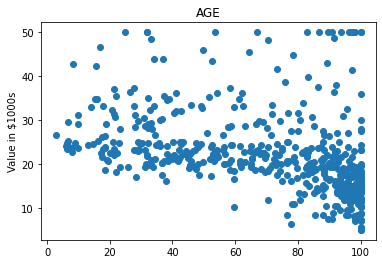

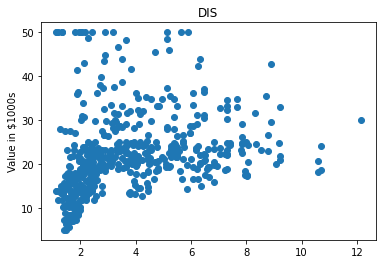

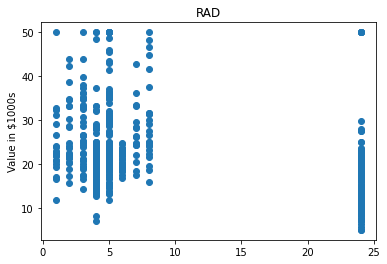

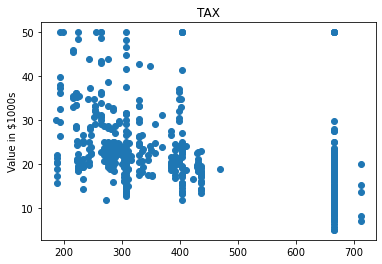

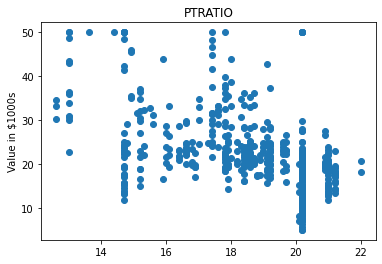

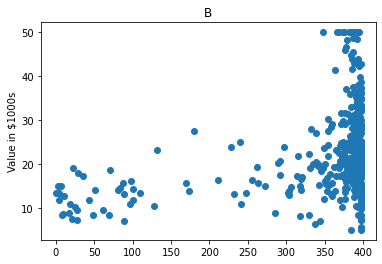

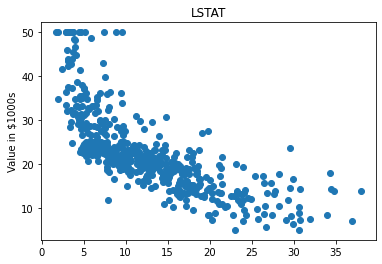

In [3]:
#Visual inspection of the data


for i in range(X.shape[1]):
    plt.scatter(X[:,i],y)
    plt.title(boston.feature_names[i])
    plt.ylabel('Value in $1000s')
    plt.show()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

We first train a model using all the data

In [5]:
#Train a model
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X,y)


LinearRegression()

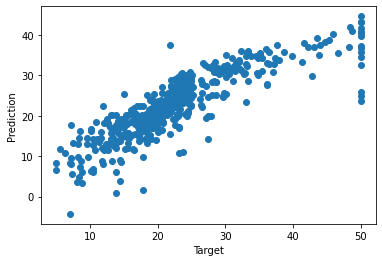

In [6]:
# Visual result
y_predict_lin = reg.predict(X)
plt.scatter(y,y_predict_lin)
plt.ylabel('Prediction')
plt.xlabel('Target')
plt.show()

Now, we split the data into training and validation

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Split into training and validation set
# the test_size is the proportion of samples to be put into the validation set
# the random_state is initialziing the random generator to have reproducible results
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=40)

In [9]:
# We train on the training set only
reg.fit(X_train, y_train)

#Predict for both dataset
y_train_predict_lin = reg.predict(X_train)
y_val_predict_lin = reg.predict(X_val)



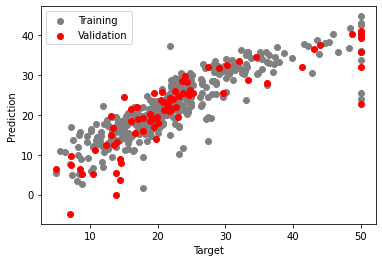

In [10]:
# Plot the result

plt.scatter(y_train,y_train_predict_lin,color='gray',label='Training')
plt.scatter(y_val,y_val_predict_lin,color='red',label='Validation')
plt.legend()
plt.ylabel('Prediction')
plt.xlabel('Target')
plt.show()


In [11]:
#Score
from sklearn.metrics import mean_squared_error, make_scorer
score = make_scorer(mean_squared_error)

score(reg,X_val, y_val)

40.21680801447822

We now use cross validation

In [12]:
from sklearn.model_selection import cross_val_score

score_lin = cross_val_score(reg,X,y,cv = 5, scoring=score)
print('mean=',score_lin.mean(),' ; std=',score_lin.std())

mean= 37.13180746769897  ; std= 23.091945335664057


We can compare the score with another fancier model

In [13]:
# Try a fancier model ?
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_features=10, random_state=10)
rf.fit(X,y)

RandomForestRegressor(max_features=10, random_state=10)

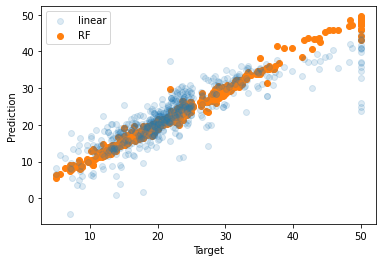

In [14]:
y_predict_rf = rf.predict(X)
plt.scatter(y,y_predict_lin,label='linear',zorder=2,alpha=.15)
plt.scatter(y,y_predict_rf,label='RF',zorder=1)
plt.legend()

plt.ylabel('Prediction')
plt.xlabel('Target')
plt.show()

In [15]:
# Cross Validation score

score_rf = cross_val_score(rf,X,y,cv = 5, scoring=score)
print('mean (RF) =',score_rf.mean(),' ; std (RF) =',score_rf.std())
print('mean (LIN)=',score_lin.mean(),' ; std (LIN)=',score_lin.std())


mean (RF) = 20.86636176053193  ; std (RF) = 13.608636165891285
mean (LIN)= 37.13180746769897  ; std (LIN)= 23.091945335664057
